<a href="https://colab.research.google.com/github/AatifDakhway/ALY6110/blob/main/Module_4_1_Lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 # innstall java
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

# install spark (change the version number if needed)
!wget -q https://archive.apache.org/dist/spark/spark-3.0.0/spark-3.0.0-bin-hadoop3.2.tgz

# unzip the spark file to the current folder
!tar xf spark-3.0.0-bin-hadoop3.2.tgz

# set your spark folder to your system path environment. 
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.0.0-bin-hadoop3.2"


# install findspark using pip
!pip install -q findspark

#Installing profiling
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     - 21.8 MB 222 kB/s
     |████████████████████████████████| 596 kB 4.4 MB/s 
     |████████████████████████████████| 102 kB 73.2 MB/s 
     |████████████████████████████████| 690 kB 48.3 MB/s 
     |████████████████████████████████| 4.7 MB 43.7 MB/s 
     |████████████████████████████████| 62 kB 1.3 MB/s 
     |████████████████████████████████| 812 kB 54.5 MB/s 
     |████████████████████████████████| 38.1 MB 369 kB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-3.2.0-py2.py3-none-any.whl size=262599 sha256=ed48beb654bf758501700fc265889093c958d3b045338f239bda006f3ce023c5
  Stored in directory: /tmp/pip-ephem-wheel-cache-aa42tcct/wheels/cc/d5/09/083fb07c9363a2f45854b0e3a7de7d7c560f07da74b9e9769d
  Created wheel for htmlmin: filename=htmlmin-0.1.12-py3-none-any.whl size=27098 sha256=cad9559bb0e34895626a7410335e3ed20149c565ad1b0c98468ed8098c487cc2
  Stored in director

In [2]:
import findspark
findspark.init()
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

In [3]:
#Import Library
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.regression import LinearRegression
from pyspark.ml.feature import VectorAssembler, StandardScaler, PCA
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
from google.colab import files
uploaded = files.upload()

Saving Placement_Data_Full_Class.csv to Placement_Data_Full_Class.csv


In [5]:
dataset = spark.read.csv('Placement_Data_Full_Class.csv', inferSchema=True, header = True)

In [41]:
dataset.show(10)

+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+------+--------+
|sl_no|gender|ssc_p|  ssc_b|hsc_p|  hsc_b|   hsc_s|degree_p| degree_t|workex|etest_p|specialisation|mba_p|status|  salary|
+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+------+--------+
|  1.0|     M| 67.0| Others| 91.0| Others|Commerce|    58.0| Sci&Tech|    No|   55.0|        Mkt&HR| 58.8|   1.0|270000.0|
|  2.0|     M|79.33|Central|78.33| Others| Science|   77.48| Sci&Tech|   Yes|   86.5|       Mkt&Fin|66.28|   1.0|200000.0|
|  3.0|     M| 65.0|Central| 68.0|Central|    Arts|    64.0|Comm&Mgmt|    No|   75.0|       Mkt&Fin| 57.8|   1.0|250000.0|
|  4.0|     M| 56.0|Central| 52.0|Central| Science|    52.0| Sci&Tech|    No|   66.0|        Mkt&HR|59.43|   0.0|     0.0|
|  5.0|     M| 85.8|Central| 73.6|Central|Commerce|    73.3|Comm&Mgmt|    No|   96.8|       Mkt&Fin| 55.5|   1.0|425000.0|
|  6.0|     M| 5

In [7]:
#number of rows in this dataset
count = dataset.count()
n = dataset.columns
print("The number of columns in this dataset is: %a" %len(n))
print("The number of rows in this dataset is: %a" %count)

The number of columns in this dataset is: 15
The number of rows in this dataset is: 215


In [8]:

# Find Count of Null, None, NaN of All DataFrame Columns
from pyspark.sql.functions import col,isnan, when, count
dataset.select([count(when(isnan(c) | col(c).isNull(), c)).alias(c) for c in dataset.columns]).show()

+-----+------+-----+-----+-----+-----+-----+--------+--------+------+-------+--------------+-----+------+------+
|sl_no|gender|ssc_p|ssc_b|hsc_p|hsc_b|hsc_s|degree_p|degree_t|workex|etest_p|specialisation|mba_p|status|salary|
+-----+------+-----+-----+-----+-----+-----+--------+--------+------+-------+--------------+-----+------+------+
|    0|     0|    0|    0|    0|    0|    0|       0|       0|     0|      0|             0|    0|     0|    67|
+-----+------+-----+-----+-----+-----+-----+--------+--------+------+-------+--------------+-----+------+------+



In [9]:
dataset.describe().show()

+-------+-----------------+------+------------------+-------+------------------+-------+-------+-----------------+---------+------+------------------+--------------+------------------+----------+-----------------+
|summary|            sl_no|gender|             ssc_p|  ssc_b|             hsc_p|  hsc_b|  hsc_s|         degree_p| degree_t|workex|           etest_p|specialisation|             mba_p|    status|           salary|
+-------+-----------------+------+------------------+-------+------------------+-------+-------+-----------------+---------+------+------------------+--------------+------------------+----------+-----------------+
|  count|              215|   215|               215|    215|               215|    215|    215|              215|      215|   215|               215|           215|               215|       215|              148|
|   mean|            108.0|  null|  67.3033953488372|   null| 66.33316279069766|   null|   null|66.37018604651163|     null|  null| 72.100558139

In [10]:
dataset = dataset.fillna(value=0,subset=["salary"])

In [11]:
dataset.show()

+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+----------+------+
|sl_no|gender|ssc_p|  ssc_b|hsc_p|  hsc_b|   hsc_s|degree_p| degree_t|workex|etest_p|specialisation|mba_p|    status|salary|
+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+----------+------+
|    1|     M| 67.0| Others| 91.0| Others|Commerce|    58.0| Sci&Tech|    No|   55.0|        Mkt&HR| 58.8|    Placed|270000|
|    2|     M|79.33|Central|78.33| Others| Science|   77.48| Sci&Tech|   Yes|   86.5|       Mkt&Fin|66.28|    Placed|200000|
|    3|     M| 65.0|Central| 68.0|Central|    Arts|    64.0|Comm&Mgmt|    No|   75.0|       Mkt&Fin| 57.8|    Placed|250000|
|    4|     M| 56.0|Central| 52.0|Central| Science|    52.0| Sci&Tech|    No|   66.0|        Mkt&HR|59.43|Not Placed|     0|
|    5|     M| 85.8|Central| 73.6|Central|Commerce|    73.3|Comm&Mgmt|    No|   96.8|       Mkt&Fin| 55.5|    Placed|425000|


In [12]:
dataset.dtypes

[('sl_no', 'int'),
 ('gender', 'string'),
 ('ssc_p', 'double'),
 ('ssc_b', 'string'),
 ('hsc_p', 'double'),
 ('hsc_b', 'string'),
 ('hsc_s', 'string'),
 ('degree_p', 'double'),
 ('degree_t', 'string'),
 ('workex', 'string'),
 ('etest_p', 'double'),
 ('specialisation', 'string'),
 ('mba_p', 'double'),
 ('status', 'string'),
 ('salary', 'int')]

In [13]:
#count the Gender present in the datasets
dataset.groupBy('gender').count().show()

#count the search Field of Study in the datasets
dataset.groupBy('hsc_s').count().show()

# Count the Specialization
dataset.groupBy('specialisation').count().show()

+------+-----+
|gender|count|
+------+-----+
|     F|   76|
|     M|  139|
+------+-----+

+--------+-----+
|   hsc_s|count|
+--------+-----+
| Science|   91|
|Commerce|  113|
|    Arts|   11|
+--------+-----+

+--------------+-----+
|specialisation|count|
+--------------+-----+
|       Mkt&Fin|  120|
|        Mkt&HR|   95|
+--------------+-----+



In [14]:
#Replacing the values of status by 0 and 1
from pyspark.sql.functions import when
dataset = dataset.withColumn("status", when(dataset.status == "Placed",1) \
      .when(dataset.status == "Not Placed",0))

dataset.show(10)

+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+------+------+
|sl_no|gender|ssc_p|  ssc_b|hsc_p|  hsc_b|   hsc_s|degree_p| degree_t|workex|etest_p|specialisation|mba_p|status|salary|
+-----+------+-----+-------+-----+-------+--------+--------+---------+------+-------+--------------+-----+------+------+
|    1|     M| 67.0| Others| 91.0| Others|Commerce|    58.0| Sci&Tech|    No|   55.0|        Mkt&HR| 58.8|     1|270000|
|    2|     M|79.33|Central|78.33| Others| Science|   77.48| Sci&Tech|   Yes|   86.5|       Mkt&Fin|66.28|     1|200000|
|    3|     M| 65.0|Central| 68.0|Central|    Arts|    64.0|Comm&Mgmt|    No|   75.0|       Mkt&Fin| 57.8|     1|250000|
|    4|     M| 56.0|Central| 52.0|Central| Science|    52.0| Sci&Tech|    No|   66.0|        Mkt&HR|59.43|     0|     0|
|    5|     M| 85.8|Central| 73.6|Central|Commerce|    73.3|Comm&Mgmt|    No|   96.8|       Mkt&Fin| 55.5|     1|425000|
|    6|     M| 55.0| Others| 49.

In [15]:
dataset.groupby('status').count().toPandas()

status  count
0       1    148
1       0     67

In [17]:
db.isnull().sum()

sl_no             0
gender            0
ssc_p             0
ssc_b             0
hsc_p             0
hsc_b             0
hsc_s             0
degree_p          0
degree_t          0
workex            0
etest_p           0
specialisation    0
mba_p             0
status            0
salary            0
dtype: int64

In [19]:
from pyspark.sql.types import StringType, DateType, FloatType
  
dataset = dataset \
  .withColumn("sl_no" ,
              dataset["sl_no"]
              .cast('double'))   \
  .withColumn("salary",
              dataset["salary"]
              .cast('double'))    \
  .withColumn("status",
              dataset["status"]
              .cast('double')) \
  
dataset.printSchema()

root
 |-- sl_no: double (nullable = true)
 |-- gender: string (nullable = true)
 |-- ssc_p: double (nullable = true)
 |-- ssc_b: string (nullable = true)
 |-- hsc_p: double (nullable = true)
 |-- hsc_b: string (nullable = true)
 |-- hsc_s: string (nullable = true)
 |-- degree_p: double (nullable = true)
 |-- degree_t: string (nullable = true)
 |-- workex: string (nullable = true)
 |-- etest_p: double (nullable = true)
 |-- specialisation: string (nullable = true)
 |-- mba_p: double (nullable = true)
 |-- status: double (nullable = true)
 |-- salary: double (nullable = true)



In [20]:
numeric_features = [t[0] for t in dataset.dtypes if t[1] == 'double']
dataset.select(numeric_features).describe().toPandas().transpose()

0                   1                    2      3         4
summary   count                mean               stddev    min       max
sl_no       215               108.0    62.20932405998316    1.0     215.0
ssc_p       215    67.3033953488372   10.827205398231456  40.89      89.4
hsc_p       215   66.33316279069766   10.897509157502983   37.0      97.7
degree_p    215   66.37018604651163    7.358743287339444   50.0      91.0
etest_p     215   72.10055813953488   13.275956401653826   50.0      98.0
mba_p       215  62.278186046511586    5.833384580683803  51.21     77.89
status      215  0.6883720930232559  0.46423955623438806    0.0       1.0
salary      215  198702.32558139536   154780.92671560097    0.0  940000.0

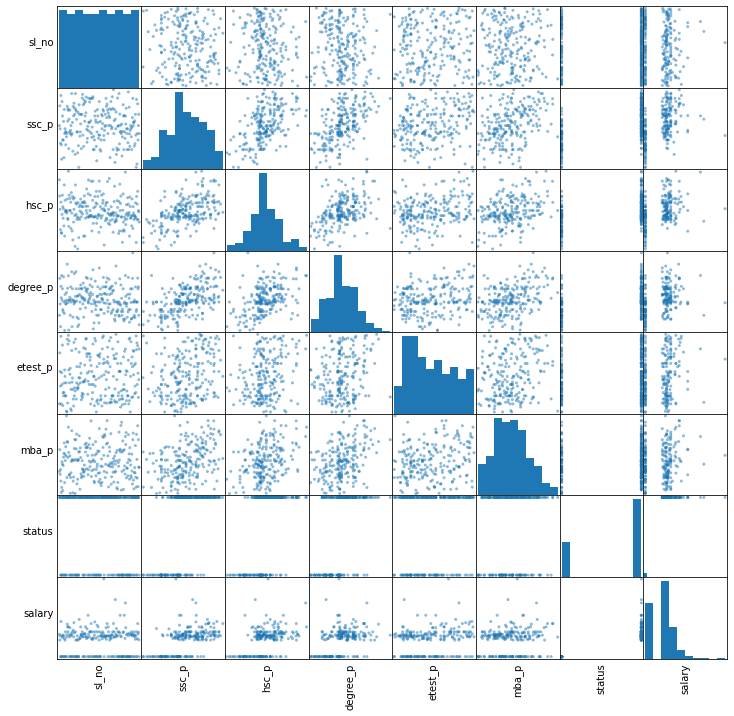

In [21]:
from pandas.plotting import scatter_matrix
numeric_data = dataset.select(numeric_features).toPandas()
axs = pd.plotting.scatter_matrix(numeric_data, figsize=(12, 12));
n = len(numeric_data.columns)
for i in range(n):
    v = axs[i, 0]
    v.yaxis.label.set_rotation(0)
    v.yaxis.label.set_ha('right')
    v.set_yticks(())
    h = axs[n-1, i]
    h.xaxis.label.set_rotation(90)
    h.set_xticks(())

In [22]:
# drop string cols
no_str_df = dataset.drop("gender", "ssc_b", "hsc_b", "hsc_s", "degree_t", "workex", "specialisation")

from pandas_profiling import ProfileReport

profile = ProfileReport(no_str_df.toPandas(), title="Report", explorative=True)
profile.to_widgets()

/usr/local/lib/python3.7/dist-packages/pandas_profiling/profile_report.py:406: UserWarning: Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60).As an alternative, you can use the HTML report. See the documentation for more information.
  "Ipywidgets is not yet fully supported on Google Colab (https://github.com/googlecolab/colabtools/issues/60)."


Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render widgets:   0%|          | 0/1 [00:00<?, ?it/s]

In [23]:
#Vectorization
only_feature = ['sl_no','ssc_p','hsc_p','degree_p','etest_p','mba_p','status']

In [24]:
assembler = VectorAssembler(inputCols=only_feature, outputCol = 'feature')

In [25]:
feat_df = assembler.transform(dataset).select('feature')

In [26]:
feat_df.show(5)

+--------------------+
|             feature|
+--------------------+
|[1.0,67.0,91.0,58...|
|[2.0,79.33,78.33,...|
|[3.0,65.0,68.0,64...|
|[4.0,56.0,52.0,52...|
|[5.0,85.8,73.6,73...|
+--------------------+
only showing top 5 rows



In [27]:
#Standardize features for principal component analysis
scaler = StandardScaler(
    inputCol = 'feature',
    outputCol = 'scaledFeature',
    withMean = True,
    withStd = True
).fit(feat_df)

In [28]:
df_scaled = scaler.transform(feat_df)
df_scaled.show(6)

+--------------------+--------------------+
|             feature|       scaledFeature|
+--------------------+--------------------+
|[1.0,67.0,91.0,58...|[-1.7199993990744...|
|[2.0,79.33,78.33,...|[-1.7039246383354...|
|[3.0,65.0,68.0,64...|[-1.6878498775964...|
|[4.0,56.0,52.0,52...|[-1.6717751168574...|
|[5.0,85.8,73.6,73...|[-1.6557003561184...|
|[6.0,55.0,49.8,67...|[-1.6396255953794...|
+--------------------+--------------------+
only showing top 6 rows



In [29]:
#Train model for two principal component analysis

n_components = 2
pca = PCA(
    k = n_components,
    inputCol = 'scaledFeature',
    outputCol = 'pcafeature').fit(df_scaled)

df_pca = pca.transform(df_scaled)
print("Explained Variance ratio", pca.explainedVariance.toArray())
df_pca.show(6)

Explained Variance ratio [0.41141488 0.15558948]
+--------------------+--------------------+--------------------+
|             feature|       scaledFeature|          pcafeature|
+--------------------+--------------------+--------------------+
|[1.0,67.0,91.0,58...|[-1.7199993990744...|[-0.3467891987317...|
|[2.0,79.33,78.33,...|[-1.7039246383354...|[-2.5976347246235...|
|[3.0,65.0,68.0,64...|[-1.6878498775964...|[0.00305192365130...|
|[4.0,56.0,52.0,52...|[-1.6717751168574...|[2.79727774433470...|
|[5.0,85.8,73.6,73...|[-1.6557003561184...|[-2.0211129299641...|
|[6.0,55.0,49.8,67...|[-1.6396255953794...|[2.63869893944065...|
+--------------------+--------------------+--------------------+
only showing top 6 rows



In [30]:
#Collect distributed data in numpy array and then convert to pandas dataframe
X_pca = df_pca.rdd.map(lambda row: row.pcafeature).collect()
X_pca = np.array(X_pca)

In [31]:
X_pca

array([[-3.46789199e-01, -2.37436341e+00],
       [-2.59763472e+00, -8.26734236e-01],
       [ 3.05192365e-03, -1.55239154e+00],
       [ 2.79727774e+00, -9.32832873e-01],
       [-2.02111293e+00, -1.08929302e+00],
       [ 2.63869894e+00, -1.91156489e+00],
       [ 1.89412316e+00, -1.06182314e+00],
       [-8.22541183e-01, -1.63490924e+00],
       [-1.80047607e+00, -8.06191605e-01],
       [ 2.04740176e+00, -1.95576501e+00],
       [ 9.32181062e-01, -1.64420779e+00],
       [-1.15263053e+00, -1.76662852e+00],
       [ 2.04712561e+00, -6.53789326e-01],
       [-1.48334482e+00, -1.15483489e+00],
       [ 2.92878758e+00, -7.17594562e-01],
       [-9.11865409e-01, -1.14562934e+00],
       [ 9.26837394e-02, -1.64310979e+00],
       [ 1.16837231e+00, -6.45901450e-01],
       [ 8.77875050e-01, -5.88926420e-01],
       [-7.61016194e-01, -9.92953467e-01],
       [ 6.80755063e-01, -2.34256101e+00],
       [-3.24807798e+00, -1.27275747e-01],
       [-6.70444824e-01, -1.40282514e+00],
       [-9.

In [32]:
#Convery Array to DF
df_pca = pd.DataFrame(X_pca, columns=['PC1','PC2'])
df_pca.head()

PC1       PC2
0 -0.346789 -2.374363
1 -2.597635 -0.826734
2  0.003052 -1.552392
3  2.797278 -0.932833
4 -2.021113 -1.089293

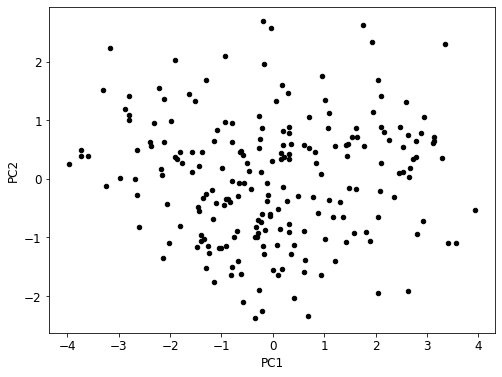

In [33]:
#Plot two principal components
plt.rcParams['figure.figsize'] = 8,6
plt.rcParams['font.size'] = 12
ax1 = df_pca.plot.scatter(x='PC1', y='PC2', c='Black')

In [34]:
#Vectorize features and target together for model development
#Linear Regression


output = assembler.transform(dataset)
#input vs output

finalized_data = output.select('feature','salary')
finalized_data.show()

+--------------------+--------+
|             feature|  salary|
+--------------------+--------+
|[1.0,67.0,91.0,58...|270000.0|
|[2.0,79.33,78.33,...|200000.0|
|[3.0,65.0,68.0,64...|250000.0|
|[4.0,56.0,52.0,52...|     0.0|
|[5.0,85.8,73.6,73...|425000.0|
|[6.0,55.0,49.8,67...|     0.0|
|[7.0,46.0,49.2,79...|     0.0|
|[8.0,82.0,64.0,66...|252000.0|
|[9.0,73.0,79.0,72...|231000.0|
|[10.0,58.0,70.0,6...|     0.0|
|[11.0,58.0,61.0,6...|260000.0|
|[12.0,69.6,68.4,7...|250000.0|
|[13.0,47.0,55.0,6...|     0.0|
|[14.0,77.0,87.0,5...|218000.0|
|[15.0,62.0,47.0,5...|     0.0|
|[16.0,65.0,75.0,6...|200000.0|
|[17.0,63.0,66.2,6...|300000.0|
|[18.0,55.0,67.0,6...|     0.0|
|[19.0,63.0,66.0,6...|     0.0|
|[20.0,60.0,67.0,7...|236000.0|
+--------------------+--------+
only showing top 20 rows



In [35]:
#Split dataset into training and testing dataset
train_data, test_data = finalized_data.randomSplit([0.8,0.2]) 

In [36]:
#Fitting Model
regressor = LinearRegression(featuresCol='feature', labelCol='salary')

regressor = regressor.fit(train_data)

In [37]:
#Find out model coefficients and intercept
coeff = regressor.coefficients
intr = regressor.intercept

print("The coef of Model is : %a" %coeff)
print("The Intercept of the model is: %f" %intr)

The coef of Model is : DenseVector([59.5078, -313.7956, -29.2429, -1449.8479, 947.6963, 2142.6485, 302299.5889])
The Intercept of the model is: -95655.116872


In [38]:
#Evaluate model for test dataset
pred = regressor.evaluate(test_data)

#predict the model
pred.predictions.show()

+--------------------+--------+-------------------+
|             feature|  salary|         prediction|
+--------------------+--------+-------------------+
|[9.0,73.0,79.0,72...|231000.0|  295459.2353390767|
|[10.0,58.0,70.0,6...|     0.0| -40704.62734315418|
|[15.0,62.0,47.0,5...|     0.0|   1700.24398966656|
|[22.0,79.0,76.0,8...|393000.0|  295706.7162228493|
|[25.0,76.5,97.7,7...|360000.0|  317817.8055236881|
|[30.0,62.0,67.0,5...|     0.0|-16506.603651961428|
|[34.0,87.0,65.0,8...|260000.0|  301368.2865602941|
|[39.0,73.0,58.0,6...|240000.0| 261394.43518462713|
|[41.0,78.0,77.0,8...|287000.0|  266187.9885821476|
|[43.0,49.0,39.0,6...|     0.0|-34422.954886317995|
|[47.0,70.89,71.98...|     0.0|  5603.116356716346|
|[52.0,54.4,61.12,...|     0.0|  4832.612313936625|
|[53.0,40.89,45.83...|     0.0| 24283.581295850818|
|[56.0,60.4,66.6,6...|220000.0|   275061.405478385|
|[74.0,64.6,83.83,...|218000.0| 293867.46138157876|
|[75.0,56.6,64.8,7...|336000.0|   313520.811197233|
|[94.0,52.0,

In [42]:
from pyspark.ml.evaluation import RegressionEvaluator
eval = RegressionEvaluator(labelCol = "salary", predictionCol = "prediction", metricName = "rmse")

#Root Mean Square Error
rmse = eval.evaluate(pred.predictions)
print("RMSE : %f" %rmse)

#mean square error

mse = eval.evaluate(pred.predictions,{eval.metricName: "mse"})

print("MSE: %.3f" % mse)



#mean absolute error

mae = eval.evaluate(pred.predictions,{eval.metricName: "mae"})

print("MAE: %.3f" % mae)



#r2 - coefficient

r2 = eval.evaluate(pred.predictions,{eval.metricName: "r2"})

print("r2: %.3f" % r2)



RMSE : 42480.546082
MSE: 1804596795.388
MAE: 33455.791
r2: 0.903
